# Bay Area Rapid Transport project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing station info

In [2]:
#Importing station dataframe
station_df = pd.read_csv('station_info.csv')
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
Abbreviation    46 non-null object
Description     46 non-null object
Location        46 non-null object
Name            46 non-null object
dtypes: object(4)
memory usage: 1.6+ KB


In [3]:
station_df.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


## Importing 2016 BART data

In [4]:
#Importing BART 2016 dataframe
df_2016 = pd.read_csv('date-hour-soo-dest-2016.csv')
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971582 entries, 0 to 9971581
Data columns (total 4 columns):
Origin         object
Destination    object
Throughput     int64
DateTime       object
dtypes: int64(1), object(3)
memory usage: 304.3+ MB


In [5]:
df_2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


## Importing 2017 BART data

In [6]:
#Importing BART 2017 dataframe
df_2017 = pd.read_csv('date-hour-soo-dest-2017.csv')
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313625 entries, 0 to 3313624
Data columns (total 4 columns):
Origin         object
Destination    object
Throughput     int64
DateTime       object
dtypes: int64(1), object(3)
memory usage: 101.1+ MB


In [7]:
df_2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


### Combining 2016 and 2017 BART data into one dataframe

In [8]:
#Append BART 2016 and 2017 dataframe
df = df_2016.append(df_2017, ignore_index = True)
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13285207 entries, 0 to 13285206
Data columns (total 4 columns):
Origin         object
Destination    object
Throughput     int64
DateTime       object
dtypes: int64(1), object(3)
memory usage: 405.4+ MB


In [10]:
#Changing dtype for DateTime attribute from object to actual datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
station_df.head(2)

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)


In [12]:
#Removing <br /> from Description attribute
station_df['Description'].replace('(<br />)', ' ', regex = True, inplace = True)
station_df.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612 12th St. Oakla...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110 ""T...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612 19th Street St...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110 ""T...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703 Ashby S...","-122.270062,37.852803,0",Ashby (ASHB)


In [13]:
#Viewing the first two Description in full
print (station_df['Description'][0])
print (station_df['Description'][1])

1245 Broadway, Oakland CA 94612 12th St. Oakland City Center Station is in the heart of Downtown Oakland, near historic Old Oakland and Oakland's Chinatown.
2000 Mission Street, San Francisco CA 94110 "The Mission" refers to the San Francisco de Asis Mission, also known as Mission Dolores, which was founded 1776. Today the neighborhood is host to an eclectic mix of restaurants, markets, performance spaces, shops, and nightspots.


In [14]:
#Creating new attribute called City 
station_df['City'] = station_df['Description'].apply(lambda x: x.split(', ')[1])
station_df['City'].replace('CA(.*)$', '', regex = True, inplace = True)
station_df['City'].unique()

array(['Oakland ', 'San Francisco ', 'Berkeley ', 'San Leandro ',
       'Castro Valley ', 'Colma ', 'Concord ', 'Daly City ',
       'El Cerrito ', 'Pleasanton ', 'Fremont ', 'Hayward ', 'Lafayette ',
       'Millbrae ', 'Orinda ', 'Walnut Creek ', 'Pittsburg ', 'Richmond ',
       'San Bruno ', 'Level 3', 'South San Francisco ', 'Union City ',
       'Fremont', 'Dublin '], dtype=object)

In [15]:
#Checking out Level 3
station_df[station_df['City'] == 'Level 3']

,Abbreviation,Description,Location,Name,City
38,SFIA,"International Terminal, Level 3, San Francisco...","-122.392409,37.615966,0",San Francisco Int'l Airport (SFIA),Level 3


In [16]:
#Changing City from Level 3 to San Francsisco
station_df['City'].replace('Level 3', 'San Francisco', inplace = True)

In [17]:
#Separating attribute Location into attributes for longitude and latitude
station_df['Latitude'] = station_df['Location'].apply(lambda x: x.split(',')[0])
station_df['Longitude'] = station_df['Location'].apply(lambda x: x.split(',')[1])

### Merging station dataframe with main dataframe

In [18]:
#Renaming station dataframe columns to distinguish Origin station info prior to merging to main dataframe
origin_df = station_df[['Abbreviation','Name', 'Latitude', 'Longitude', 'City']]
origin_df = origin_df.rename(columns = {'Abbreviation': 'Origin', 
                                        'Name': 'Ori_Name', 
                                        'Latitude': 'Ori_Latitude', 
                                        'Longitude': 'Ori_Longitude', 
                                        'City': 'Ori_City'})

In [19]:
#Renaming Abbreviation, Location and Name columns in order to distinguish Destination stations prior to merging station 
#dataframe with the main dataframe
dest_df = station_df[['Abbreviation','Name', 'Latitude', 'Longitude', 'City']]
dest_df = dest_df.rename(columns = {'Abbreviation': 'Destination', 
                                    'Name': 'Dest_Name', 
                                    'Latitude': 'Dest_Latitude', 
                                    'Longitude': 'Dest_Longitude', 
                                    'City' : 'Dest_ City'})

In [20]:
#Merging Destination station dataframe with main dataframe for Destination
df = df.merge(origin_df, how = 'left', on = 'Origin')

In [21]:
#Merging Origin station dataframe with main dataframe
df = df.merge(dest_df, how = 'left', on = 'Destination')
#Checking for nulls in newly merged dataframe
df.isnull().sum()

Origin                0
Destination           0
Throughput            0
DateTime              0
Ori_Name          15440
Ori_Latitude      15440
Ori_Longitude     15440
Ori_City          15440
Dest_Name         16551
Dest_Latitude     16551
Dest_Longitude    16551
Dest_ City        16551
dtype: int64

In [22]:
#Data above shows that there are 16551 null cells for Destination location and Name, so displaying dataframe containing
#these nulls for further observation
df[df['Dest_Name'].isnull()]

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City
6115834,WSPR,WSPR,1,2016-08-11 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6273145,WSPR,WSPR,1,2016-08-17 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298044,19TH,WSPR,1,2016-08-18 09:00:00,19th St. Oakland (19TH),-122.268602,37.808350,Oakland,NaN,NaN,NaN,NaN
6298569,EMBR,WSPR,1,2016-08-18 09:00:00,Embarcadero (EMBR),-122.397020,37.792874,San Francisco,NaN,NaN,NaN,NaN
6301054,WSPR,WSPR,1,2016-08-18 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13284889,MONT,WSPR,9,2017-05-03 23:00:00,Montgomery St. (MONT),-122.401066,37.789405,San Francisco,NaN,NaN,NaN,NaN
13285017,POWL,WSPR,2,2017-05-03 23:00:00,Powell St. (POWL),-122.407974,37.784471,San Francisco,NaN,NaN,NaN,NaN
13285068,SANL,WSPR,1,2017-05-03 23:00:00,San Leandro (SANL),-122.160844,37.721947,San Leandro,NaN,NaN,NaN,NaN
13285118,SFIA,WSPR,5,2017-05-03 23:00:00,San Francisco Int'l Airport (SFIA),-122.392409,37.615966,San Francisco,NaN,NaN,NaN,NaN


In [23]:
#Common factor in Destination nulls may regard to the Destination attribute; therefore, checking the unique values here.
df[df['Dest_Name'].isnull()]['Destination'].unique()

array(['WSPR'], dtype=object)

In [24]:
#Destination attribute containing WSPR as destination abbreviation is cross-checked with the original list of station
#abbreviation since WSPR must not exist, leading to null cells for Location and Name
station_df['Abbreviation'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK'], dtype=object)

There seems to be a destination station abbreviated as WSPR that does not exist in the original list from station data provided. We will move on to see if this is the same case for the nulls in Origin.

In [25]:
#Viewing the unique data in Origin that is causing null for Origin location and Name
Origin_null = df[df['Ori_Name'].isnull()]
Origin_null['Origin'].unique()

array(['WSPR'], dtype=object)

In [26]:
#Double checking if WSPR was originally in station dataframe
Origin_null['Origin'].isin(station_df['Abbreviation']).value_counts()

False    15440
Name: Origin, dtype: int64

Since the cause for nulls in both Destination and Origin is a station abbreviated as WSPR, we will have to remove these data as we are unsure if this is a mistake on the list of stations given or a typo on the BART data provided for 2016 and 2017, to which we are unable to identify the closest station resembling this station. 

In [27]:
#Dropping all null cells from Origin/Destination stations that do not exist in station dataframe
df.dropna(axis = 0, inplace = True)

In [28]:
df.head()

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City
0,12TH,12TH,1,2016-01-01,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland
1,12TH,16TH,1,2016-01-01,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,16th St. Mission (16TH),-122.419694,37.765062,San Francisco
2,12TH,24TH,4,2016-01-01,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,24th St. Mission (24TH),-122.418143,37.752470,San Francisco
3,12TH,ASHB,4,2016-01-01,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,Ashby (ASHB),-122.270062,37.852803,Berkeley
4,12TH,BALB,2,2016-01-01,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,Balboa Park (BALB),-122.447506,37.721585,San Francisco


## Data Visualization

In [29]:
df['Throughput'].max()

1826

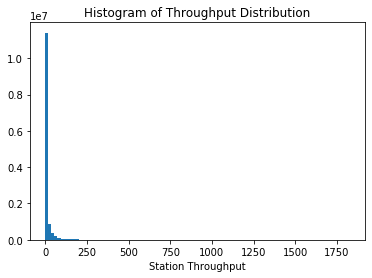

In [30]:
plt.hist(df['Throughput'], bins = 100)
plt.xlabel('Station Throughput')
plt.title('Histogram of Throughput Distribution')
plt.show()

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


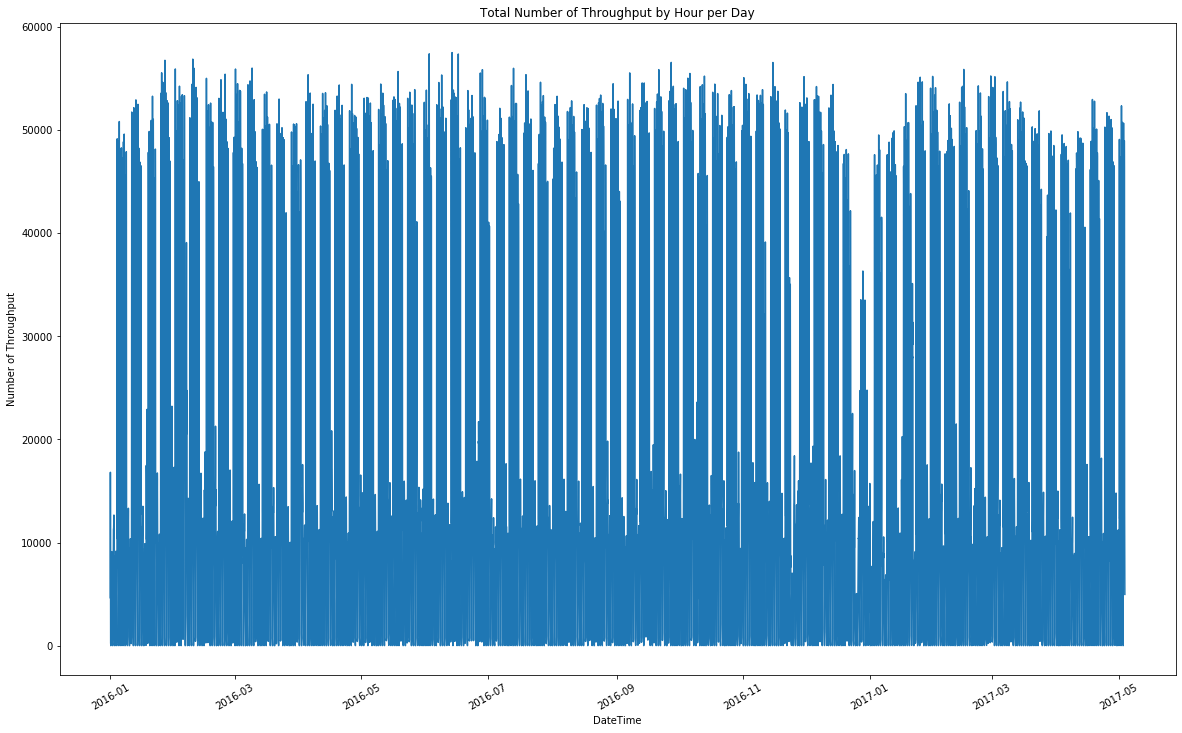

In [31]:
total_throughput = df.groupby('DateTime')['Throughput'].sum().reset_index()

plt.figure(figsize = (20, 12))
plt.plot(total_throughput['DateTime'], total_throughput['Throughput'])
plt.title('Total Number of Throughput by Hour per Day')
plt.xlabel('DateTime')
plt.xticks(rotation = 30)
plt.ylabel('Number of Throughput')
plt.show();

### Data Analytics Question #1

Which BART station is the busiest?

In [32]:
#Viewing the number of unique values in column Throughput and the data that has the highest number of throughput
print('the number of unique values is: ', df['Throughput'].nunique())
df[df['Throughput'] == df['Throughput'].max()]

the number of unique values is:  950


,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City
10504519,24TH,CIVC,1826,2017-01-21 16:00:00,24th St. Mission (24TH),-122.418143,37.752470,San Francisco,Civic Center/UN Plaza (CIVC),-122.414123,37.779732,San Francisco


In [33]:
#Start by grouping by the sum of throughputs by station for Origins and Destinations
origin = df.groupby(['Origin'])['Throughput'].sum().sort_values(ascending = False)
destination = df.groupby(['Destination'])['Throughput'].sum().sort_values(ascending = False)

In [34]:
#Turning the groupby's into dataframes
origin_station = pd.DataFrame(data = origin)
destination_station = pd.DataFrame(data = destination)

In [35]:
#Built a dataframe that merged both groupby's dataframes
busy_station = origin_station.merge(destination_station, how = 'left', left_index = True, right_index = True).reset_index()
busy_station.rename(columns = {'Origin': 'Station', 'Throughput_x': 'Origin_Throughput', 'Throughput_y': 'Dest_Throughput'},
                    inplace = True)
busy_station.head()

,Station,Origin_Throughput,Dest_Throughput
0,MONT,16092804,16942893
1,EMBR,15733036,18308407
2,POWL,14131735,12449029
3,CIVC,10139171,9386011
4,24TH,5458712,5302403


In [36]:
#Summed throughputs from both Origin and Destination for a total number of throughputs and printed the station with 
#the highest sum of throughputs
busy_station['Sum_Throughput'] = busy_station['Origin_Throughput'] + busy_station['Dest_Throughput']
busy_station[busy_station['Sum_Throughput'] == busy_station['Sum_Throughput'].max()]

,Station,Origin_Throughput,Dest_Throughput,Sum_Throughput
1,EMBR,15733036,18308407,34041443


Station EMBR is the busiest station.

### Data Anlytics Question #2

What is the least popular station?

In [37]:
#Least popular BART station
busy_station[busy_station['Sum_Throughput'] == busy_station['Sum_Throughput'].min()]

,Station,Origin_Throughput,Dest_Throughput,Sum_Throughput
44,OAKL,698694,620832,1319526


OAKL station is the least popular station.

### Data Analytics Question #3

What is the best time to go to SF from Berkeley if you want to find a seat?

In [38]:
#Setting attributes for Date and Time
df['Date'] = df['DateTime'].apply(lambda x: x.date())
df['Time'] = df['DateTime'].apply(lambda x: x.time())

In [39]:
#Selecting data where the Origin City is Berkeley and Destinatino City is San Francisco
Berkeley_SF = df[(df['Ori_City'] == 'Berkeley ') & (df['Dest_ City'] == 'San Francisco ')]
Berkeley_SF.head()

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City,Date,Time
134,ASHB,16TH,4,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,16th St. Mission (16TH),-122.419694,37.765062,San Francisco,2016-01-01,00:00:00
136,ASHB,CIVC,2,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,Civic Center/UN Plaza (CIVC),-122.414123,37.779732,San Francisco,2016-01-01,00:00:00
140,ASHB,EMBR,1,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,Embarcadero (EMBR),-122.397020,37.792874,San Francisco,2016-01-01,00:00:00
143,ASHB,MONT,1,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,Montgomery St. (MONT),-122.401066,37.789405,San Francisco,2016-01-01,00:00:00
277,DBRK,16TH,2,2016-01-01,Downtown Berkeley (DBRK),-122.268133,37.870104,Berkeley,16th St. Mission (16TH),-122.419694,37.765062,San Francisco,2016-01-01,00:00:00


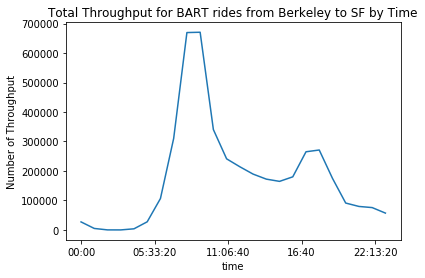

In [40]:
#Plotting the number of Throughputs at each time
plt.plot(Berkeley_SF.groupby('Time')['Throughput'].sum())
plt.ylabel('Number of Throughput')
plt.title('Total Throughput for BART rides from Berkeley to SF by Time')
plt.show();

In [41]:
#Grouped by data with Time, Origin Name, and Destination Name with the summed Throughput
Berkeley_SF = Berkeley_SF.groupby(['Time', 'Ori_Name', 'Dest_Name'])['Throughput'].sum().reset_index()
Berkeley_SF

,Time,Ori_Name,Dest_Name,Throughput
0,00:00:00,Ashby (ASHB),16th St. Mission (16TH),641
1,00:00:00,Ashby (ASHB),24th St. Mission (24TH),667
2,00:00:00,Ashby (ASHB),Balboa Park (BALB),188
3,00:00:00,Ashby (ASHB),Civic Center/UN Plaza (CIVC),590
4,00:00:00,Ashby (ASHB),Embarcadero (EMBR),424
...,...,...,...,...
557,23:00:00,North Berkeley (NBRK),Civic Center/UN Plaza (CIVC),1360
558,23:00:00,North Berkeley (NBRK),Embarcadero (EMBR),998
559,23:00:00,North Berkeley (NBRK),Glen Park (GLEN),303
560,23:00:00,North Berkeley (NBRK),Montgomery St. (MONT),599


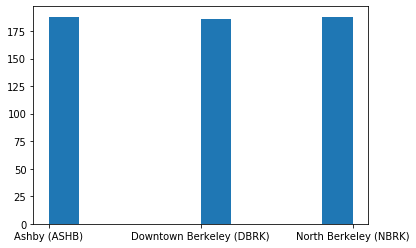

In [42]:
#Histogram all of the number of times train rides leave each Berkeley stations to SF
plt.hist(Berkeley_SF['Ori_Name'])
plt.show();

In [43]:
Berkeley_SF['Ori_Name'].value_counts()

Ashby (ASHB)                188
North Berkeley (NBRK)       188
Downtown Berkeley (DBRK)    186
Name: Ori_Name, dtype: int64

In [44]:
#Grouping the data by Time and Throughput now and divided Throughput by the total numbers of train leaving Berkeley to SF
Berkeley_SF = Berkeley_SF.groupby('Time')['Throughput'].sum().reset_index()
Berkeley_SF['Throughput'] = Berkeley_SF['Throughput']/(188+188+186)

In [45]:
Berkeley_SF

,Time,Throughput
0,00:00:00,48.405694
1,01:00:00,8.946619
2,02:00:00,0.217082
3,03:00:00,0.090747
4,04:00:00,6.777580
5,05:00:00,49.024911
6,06:00:00,189.494662
7,07:00:00,552.325623
8,08:00:00,1191.099644
9,09:00:00,1192.992883


To simplify the data to answer which time is best to travel from Berkeley to SF is to group the data by Time and summing up the number of throughput. This method disregards the affect of day and Station has on the number of riders by the hour. 

There are about 4 to 10 cars per train, where each car has an average of 54 seats. To be a bit more generous, we will assume that there are 10 cars on the trains from Berkeley to SF; therefore, giving us a total of 540 seats per train. With these numbers in mind, the best time to take BART from Berkeley to SF would be any time that is outside of 7am to 10am.

### Data Analytics Question #4

What is the busiest day of the week?

In [46]:
import time
import datetime

#Converting Datetime into a tuple
df['DateTime'] = df['DateTime'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').timetuple())

In [47]:
df.head()

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City,Date,Time
0,12TH,12TH,1,"(2016, 1, 1, 0, 0, 0, 4, 1, -1)",12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,2016-01-01,00:00:00
1,12TH,16TH,1,"(2016, 1, 1, 0, 0, 0, 4, 1, -1)",12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,16th St. Mission (16TH),-122.419694,37.765062,San Francisco,2016-01-01,00:00:00
2,12TH,24TH,4,"(2016, 1, 1, 0, 0, 0, 4, 1, -1)",12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,24th St. Mission (24TH),-122.418143,37.752470,San Francisco,2016-01-01,00:00:00
3,12TH,ASHB,4,"(2016, 1, 1, 0, 0, 0, 4, 1, -1)",12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,Ashby (ASHB),-122.270062,37.852803,Berkeley,2016-01-01,00:00:00
4,12TH,BALB,2,"(2016, 1, 1, 0, 0, 0, 4, 1, -1)",12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,Balboa Park (BALB),-122.447506,37.721585,San Francisco,2016-01-01,00:00:00


In [48]:
#Day of the week that is busiest
df['WeekDay'] = df['DateTime'].apply(lambda x: x[6])
df['WeekDay'].mode()

0    4
dtype: int64

The most busiest day of the Week is Thursday.

### Data Analytics Question #5

How many people take the BART late at night?

In [49]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)

In [50]:
#DataFrame for the number of people taking the BART late at night (11pm - 3am)
late = df.loc[(df['Hour'] <= 3) | (df['Hour'] == 23)]
print( 'The average number of people taking the BART late at night is: ', late.groupby('Hour')['Throughput'].mean().sum())

The average number of people taking the BART late at night is:  30.096275014418634


In [51]:
#Turning DateTime into timestamp
df['DateTime'] = df['DateTime'].apply(lambda x: time.mktime(x))

### Data Science Question A

Compute a straight line distance between every station.

In [52]:
#Setting the latitudes and longitudes data type form object to floats
df['Ori_Latitude'] = df['Ori_Latitude'].astype('float')
df['Ori_Longitude'] = df['Ori_Longitude'].astype('float')
df['Dest_Latitude'] = df['Dest_Latitude'].astype('float')
df['Dest_Longitude'] = df['Dest_Longitude'].astype('float')

In [53]:
#Calculating the euclidean distances between every station
df['Distance'] = ((df['Ori_Latitude']-df['Dest_Latitude'])**2 + (df['Ori_Longitude']-df['Dest_Longitude'])**2)**(1/2)

In [54]:
df.head()

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City,Date,Time,WeekDay,Hour,Distance
0,12TH,12TH,1,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,2016-01-01,00:00:00,4,0,0.000000
1,12TH,16TH,1,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,16th St. Mission (16TH),-122.419694,37.765062,San Francisco,2016-01-01,00:00:00,4,0,0.153214
2,12TH,24TH,4,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,24th St. Mission (24TH),-122.418143,37.752470,San Francisco,2016-01-01,00:00:00,4,0,0.155404
3,12TH,ASHB,4,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,Ashby (ASHB),-122.270062,37.852803,Berkeley,2016-01-01,00:00:00,4,0,0.049055
4,12TH,BALB,2,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,Balboa Park (BALB),-122.447506,37.721585,San Francisco,2016-01-01,00:00:00,4,0,0.194293


In [55]:
#Dataframe displaying the distances between each station
distances = df[['Origin', 'Destination', 'Distance']]
distances.drop_duplicates(inplace = True)
distances

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Origin,Destination,Distance
0,12TH,12TH,0.000000
1,12TH,16TH,0.153214
2,12TH,24TH,0.155404
3,12TH,ASHB,0.049055
4,12TH,BALB,0.194293
...,...,...,...
44900,WDUB,RICH,0.486539
53193,SSAN,OAKL,0.236891
58612,SSAN,CAST,0.369310
68471,ORIN,SBRN,0.334578


In [56]:
#Checking for duplicates
df.duplicated().sum()

0

In [57]:
df.head()

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City,Date,Time,WeekDay,Hour,Distance
0,12TH,12TH,1,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,2016-01-01,00:00:00,4,0,0.000000
1,12TH,16TH,1,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,16th St. Mission (16TH),-122.419694,37.765062,San Francisco,2016-01-01,00:00:00,4,0,0.153214
2,12TH,24TH,4,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,24th St. Mission (24TH),-122.418143,37.752470,San Francisco,2016-01-01,00:00:00,4,0,0.155404
3,12TH,ASHB,4,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,Ashby (ASHB),-122.270062,37.852803,Berkeley,2016-01-01,00:00:00,4,0,0.049055
4,12TH,BALB,2,1.451635e+09,12th St. Oakland City Center (12TH),-122.27145,37.803768,Oakland,Balboa Park (BALB),-122.447506,37.721585,San Francisco,2016-01-01,00:00:00,4,0,0.194293


In [58]:
#Removing unnecessary attributes
df.drop(['Dest_Name', 'Ori_Name', 'Date', 'Time', 'Ori_City', 'Dest_ City'], axis = 1, inplace = True)

In [59]:
#Removing data, where the origins and destinations were the same station
df = df[df['Distance'] != 0]

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
#Label the stations in Origin and Destination to numerical values
df['Origin'] = LabelEncoder().fit_transform(df['Origin'])
df['Destination'] = LabelEncoder().fit_transform(df['Destination'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12978027 entries, 1 to 13285191
Data columns (total 11 columns):
Origin            int32
Destination       int32
Throughput        int64
DateTime          float64
Ori_Latitude      float64
Ori_Longitude     float64
Dest_Latitude     float64
Dest_Longitude    float64
WeekDay           int64
Hour              int64
Distance          float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 1.1 GB


## Prediction model

In [63]:
#Splitting target from the rest of the data set
y,x = df['Throughput'], df.drop('Throughput', axis = 1)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [65]:
GBR = GradientBoostingRegressor(learning_rate = 0.1, random_state = 0, n_estimators=300)
RFR = RandomForestRegressor(n_estimators = 100, max_depth = 3, random_state = 0)
XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth = 3, random_state=0)

In [69]:
#Splitting 20% of data set for test set from the training set
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [70]:
#Splitting 20% of the remaining training set for validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.2, random_state = 42)

In [75]:
#Making predictions
algorithms = [RFR, GBR, XGB]
reg_type = ['RFR', 'GBR', 'XGB']

def regressions():
    RMSE = []
    R2 = []
    y_pred = []
    
    for i in range(len(algorithms)):
        y_pred = (algorithms[i].fit(x_train, y_train).predict(x_val))
        RMSE.append((mean_squared_error(y_val, y_pred))**0.5)
        R2.append(r2_score(y_val, y_pred)) 

    metrics = pd.DataFrame(columns = ['RMSE', 'R2'], index = reg_type)
    metrics['RMSE'] = RMSE
    metrics['R2'] = R2  
    return metrics

In [76]:
regressions()

C:\Users\Kimberly\Anaconda3\envs\ComputerVision\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:29] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


,RMSE,R2
RFR,30.666081,0.183219
GBR,23.854669,0.505762
XGB,31.293324,0.149464


In [78]:
#Predicting the results for test set with RMSE as the precision metric
y_pred = GBR.predict(x_test)
r2_score(y_test, y_pred)

0.5082151393493489